# Student Employability

##### Questions we would like to answer using this dataset
1. Is continuos improvement in a student's academic performance important for placement?
2. What role does Communication skill play in placement?
3. Which stream students are more likely to be coming from?
4. How about a student's performance in a competitive entrance test?
5. Does prior work experience has any bearing on campus placement outcome?

### 1. Loading Data & quick view

In [325]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [326]:
students = pd.read_csv('student.csv')

In [327]:
# A quick glimpse at first few rows
students.head()

,ID,Gender,Gender-B,Percent_SSC,Board_SSC,Board_CBSE,Board_ICSE,Percent_HSC,Board_HSC,Stream_HSC,...,S-TEST,Percentile_ET,Percent_MBA,S-TEST_SCORE,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,0,68.40,ICSE,0,1,85.6,ISC,Commerce,...,1,70.00,63.26,70.00,Marketing & Finance,75,72,57,1,280000
1,2,M,0,59.00,CBSE,1,0,62.0,CBSE,Commerce,...,1,79.00,56.51,79.00,Marketing & Finance,58,61,50,1,400000
2,4,M,0,65.92,Others,0,0,86.0,Others,Commerce,...,1,66.00,66.22,66.00,Marketing & Finance,80,63,55,1,350000
3,5,F,1,56.00,ICSE,0,1,78.0,ISC,Commerce,...,1,50.89,62.21,50.89,Marketing & HR,57,70,60,1,278000
4,8,M,0,62.60,Others,0,0,50.6,Others,Commerce,...,1,34.53,58.63,34.53,Marketing & HR,62,57,56,1,162000


In [328]:
# A quick glimpse at last few rows
students.tail()

,ID,Gender,Gender-B,Percent_SSC,Board_SSC,Board_CBSE,Board_ICSE,Percent_HSC,Board_HSC,Stream_HSC,...,S-TEST,Percentile_ET,Percent_MBA,S-TEST_SCORE,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
230,383,F,1,68.96,Others,0,0,76.00,Others,Commerce,...,1,72.15,63.08,72.15,Marketing & Finance,79,66,54,1,280000
231,384,M,0,47.68,Others,0,0,53.33,Others,Commerce,...,1,66.00,58.30,66.00,Marketing & HR,50,59,50,1,260000
232,386,M,0,70.00,CBSE,1,0,75.00,CBSE,Commerce,...,1,77.00,51.29,77.00,Marketing & Finance,60,56,52,0,0
233,388,M,0,62.00,Others,0,0,63.00,Others,Commerce,...,1,74.40,53.49,74.40,Marketing & HR,60,67,61,1,300000
234,391,M,0,65.92,Others,0,0,52.50,Others,Science,...,1,89.95,67.54,89.95,Marketing & HR,81,71,62,1,320000


In [329]:
# how many rows and columns in our data
rows = students.shape[0]
columns = students.shape[1]
print(f"There are {rows} of rows and {columns} of columns in students dataset.")


There are 235 of rows and 25 of columns in students dataset.


In [330]:
# glimpse of column names and their data types
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 25 columns):
ID                     235 non-null int64
Gender                 235 non-null object
Gender-B               235 non-null int64
Percent_SSC            235 non-null float64
Board_SSC              235 non-null object
Board_CBSE             235 non-null int64
Board_ICSE             235 non-null int64
Percent_HSC            235 non-null float64
Board_HSC              235 non-null object
Stream_HSC             235 non-null object
Percent_Degree         235 non-null float64
Course_Degree          235 non-null object
Degree_Engg            235 non-null int64
Experience_Yrs         235 non-null int64
Entrance_Test          191 non-null object
S-TEST                 235 non-null int64
Percentile_ET          235 non-null float64
Percent_MBA            235 non-null float64
S-TEST_SCORE           235 non-null float64
Specialization_MBA     235 non-null object
Marks_Communication    235 non-null 

In [331]:
# What are various entrance exams
students['Entrance_Test'].unique()

array(['CAT', 'K-MAT', 'MAT', nan, 'XAT', 'PGCET', 'GCET', 'G-MAT'],
      dtype=object)

There are some NaNs in Entrance_Test column. Let us find out is there are nulls other columns as well?

In [339]:
students.isnull().any()

ID                     False
Gender                 False
Gender-B               False
Percent_SSC            False
Board_SSC              False
Board_CBSE             False
Board_ICSE             False
Percent_HSC            False
Board_HSC              False
Stream_HSC             False
Percent_Degree         False
Course_Degree          False
Degree_Engg            False
Experience_Yrs         False
Entrance_Test           True
S-TEST                 False
Percentile_ET          False
Percent_MBA            False
S-TEST_SCORE           False
Specialization_MBA     False
Marks_Communication    False
Marks_Projectwork      False
Marks_BOCA             False
Placement              False
Salary                 False
dtype: bool

Well, only Entrance_Test column has Null values. Let us see how many nulls are there.

In [333]:
Total = students.shape[0]
null_ET = students['Entrance_Test'].isnull().sum()
null_per = (np.round(null_ET/Total,2)) * 100
print(f"There are {null_ET} missing values in Entrance_Test out of {Total} records which is about {null_per}%")

There are 44 missing values in Entrance_Test out of 235 records which is about 19.0%


### 2. Exploratroy Data Analysis (Univariate)

Let us explore each variable individually to find out more about their data distribution.

First, we would analyze categorical variables

In [334]:
# variables with char datatype (categorical columns)
students.dtypes[students.dtypes=='object'].index.tolist()

['Gender',
 'Board_SSC',
 'Board_HSC',
 'Stream_HSC',
 'Course_Degree',
 'Entrance_Test',
 'Specialization_MBA']

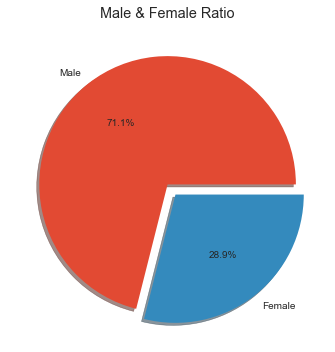

In [335]:
# Distribution of gender variable
gender_count = students.Gender.value_counts(normalize=True)
labels = ["Male", "Female"]
explode = (0, 0.1)
plt.style.use('ggplot')
plt.pie(gender_count.values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title("Male & Female Ratio")
plt.show()

This dataset contains roughly 71% to 29% male to female ratio.

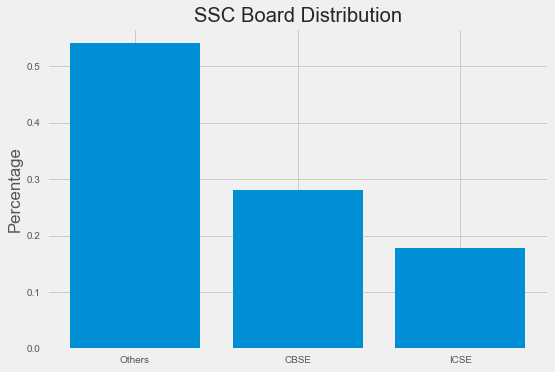

In [336]:
board_ssc = students['Board_SSC'].value_counts(normalize=True)
plt.style.use('fivethirtyeight')  # use plt.style.available to get a list of available styles
plt.bar(board_ssc.index, board_ssc.values)
plt.title("SSC Board Distribution")
plt.ylabel("Percentage")
plt.show()

As we can see from the data, more than 50% of the candidates completed their SSC from State Boards and rest are from CBSE/ICSE Board. The same holds true for HSC as well.

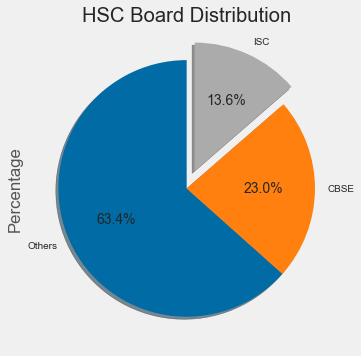

In [337]:
plt.style.use('tableau-colorblind10')
board_hsc = students['Board_HSC'].value_counts(normalize=True)
labels = board_hsc.index
explode = (0, 0, 0.15)
plt.pie(board_hsc.values, labels=labels, shadow=True, autopct='%1.1f%%', explode=explode, startangle=90)
plt.title("HSC Board Distribution")
plt.ylabel("Percentage")
plt.show()

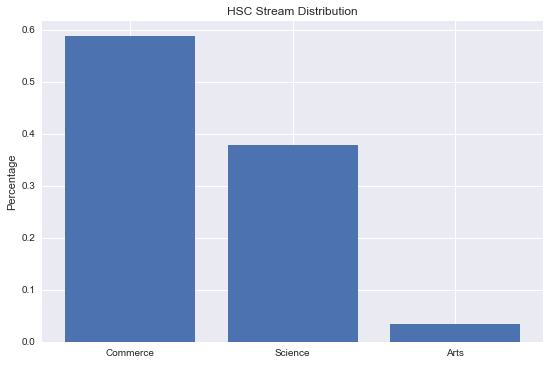

In [340]:
stream_hsc = students['Stream_HSC'].value_counts(normalize=True) 
plt.style.use('seaborn')
plt.bar(stream_hsc.index, stream_hsc.values)
plt.title("HSC Stream Distribution")
plt.ylabel("Percentage")
plt.show()

Very few candidates are from Arts stream. This data indicates candidates from Commerce & Science are more inclined towards Management programs.

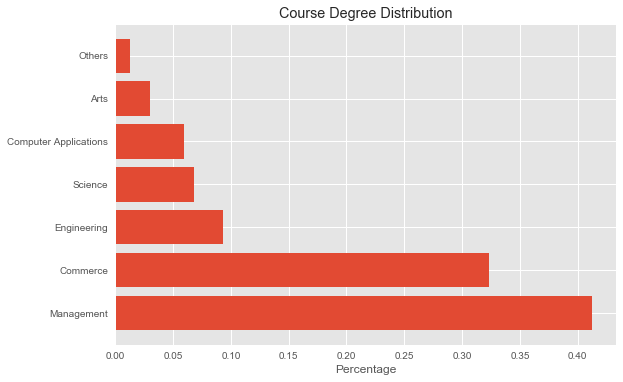

In [341]:
course_degree = students['Course_Degree'].value_counts(normalize=True)
plt.style.use('ggplot')
plt.barh(course_degree.index, course_degree.values)
plt.title("Course Degree Distribution")
plt.xlabel("Percentage")
plt.show()

Candidates with degrees in Commerce & Management seek Management programs as their obvious choice for further studies. Candidates from Arts are less than 5%.

In [342]:
students['Entrance_Test'].value_counts(normalize=True, dropna=False) # entrance_test has NA. see above

MAT      0.672340
NaN      0.187234
CAT      0.059574
K-MAT    0.059574
PGCET    0.008511
XAT      0.004255
GCET     0.004255
G-MAT    0.004255
Name: Entrance_Test, dtype: float64

Since NAs consists of approx 18% of overall, let me fill them with a new category called 'Not Available'.

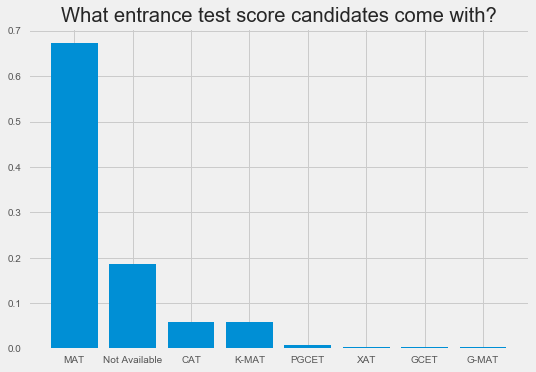

In [343]:
students['Entrance_Test'].fillna('Not Available', inplace=True)
entrance_test = students['Entrance_Test'].value_counts(normalize=True)
plt.style.use('fivethirtyeight')
plt.bar(entrance_test.index, entrance_test.values)
plt.title("What entrance test score candidates come with?")
plt.show()

As we can see, about 18% candidates do not have any entrance test information. Are they from Management Quota?

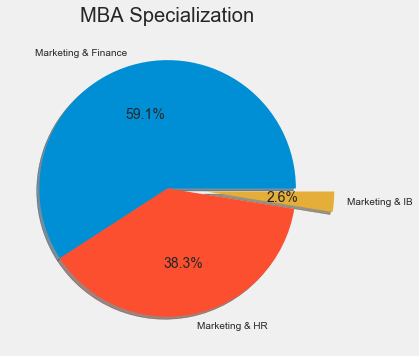

In [344]:
spec_mba = students['Specialization_MBA'].value_counts()
plt.style.use('fivethirtyeight')
labels=spec_mba.index
explode=(0,0,0.3)
plt.pie(spec_mba.values, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title("MBA Specialization")
plt.show()

Seems very few candidates are inclined towards Marketing & International Business.

This completes our univariate analysis for categorical columns.
Let us move on to numerical variables for analysis.

In [345]:
# variables with integer or float datatype (numerical columns)
students.dtypes[(students.dtypes=='int64')|(students.dtypes=='float64')].index.tolist()

['ID',
 'Gender-B',
 'Percent_SSC',
 'Board_CBSE',
 'Board_ICSE',
 'Percent_HSC',
 'Percent_Degree',
 'Degree_Engg',
 'Experience_Yrs',
 'S-TEST',
 'Percentile_ET',
 'Percent_MBA',
 'S-TEST_SCORE',
 'Marks_Communication',
 'Marks_Projectwork',
 'Marks_BOCA',
 'Placement',
 'Salary']

Here, Gender-B is redundant and it just has same labels encoded with binary. We have already analyzed it in categorical variables. Similarly, 

In [346]:
# A quick look at numerical cols except ID, Gender-B
col_list = students.dtypes[(students.dtypes=='int64')|(students.dtypes=='float64')].index.tolist()[2:]
students[col_list].head()

,Percent_SSC,Board_CBSE,Board_ICSE,Percent_HSC,Percent_Degree,Degree_Engg,Experience_Yrs,S-TEST,Percentile_ET,Percent_MBA,S-TEST_SCORE,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,68.40,0,1,85.6,72.0,0,1,1,70.00,63.26,70.00,75,72,57,1,280000
1,59.00,1,0,62.0,50.0,0,0,1,79.00,56.51,79.00,58,61,50,1,400000
2,65.92,0,0,86.0,72.0,0,1,1,66.00,66.22,66.00,80,63,55,1,350000
3,56.00,0,1,78.0,62.4,0,0,1,50.89,62.21,50.89,57,70,60,1,278000
4,62.60,0,0,50.6,52.0,0,0,1,34.53,58.63,34.53,62,57,56,1,162000


A quick look reveals that variables like Board_CBSE, Board_ICSE, Degree_Engg, S-Test, etc may be encoded versions of other categorical columns. Let us confirm before dropping them from further analysis.

In [347]:
cbse = students.loc[students['Board_SSC']=='CBSE','Board_SSC'].all()
icse = students.loc[students['Board_SSC']=='ICSE','Board_SSC'].all()
others = students.loc[students['Board_SSC']=='Others','Board_SSC'].all()
if ((cbse == 'CBSE') & (icse == 'ICSE') & (others == 'Others') ):
    print("Board_CBSE, Board_ICSE are one-hot encoded versions of Board_SSC")

Board_CBSE, Board_ICSE are one-hot encoded versions of Board_SSC


Similar analysis could be done to confirm that Degree_Engg is encoded version of 'Engineering' label of Course_Degree variable, S-Test is encoded version of Entrance_Test with 1 if any entrance test entry and 0 if not. Therefore, we can drop these columns from our further analysis. Moreover, Percentile_ET & S-Test_SCORE are exactly same. So we will retain only one of them.

In [352]:
students.dtypes[(students.dtypes=='int64')|(students.dtypes=='float64')].index[[2,5,6,8,10,11,13,14,15,16,17]]

Index(['Percent_SSC', 'Percent_HSC', 'Percent_Degree', 'Experience_Yrs',
       'Percentile_ET', 'Percent_MBA', 'Marks_Communication',
       'Marks_Projectwork', 'Marks_BOCA', 'Placement', 'Salary'],
      dtype='object')

In [348]:
# Percent_SSC
students[['Percent_SSC']].describe()

,Percent_SSC
count,235.000000
mean,64.477915
std,10.944187
min,37.000000
25%,56.450000
50%,64.000000
75%,73.880000
max,85.800000


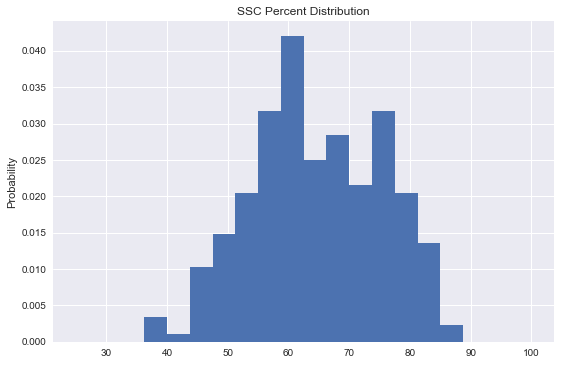

In [349]:
plt.style.use('seaborn')
plt.hist(students['Percent_SSC'], bins=20, density=True, log=False, range=(25, 100))
plt.title("SSC Percent Distribution")
plt.ylabel("Probability")
plt.show()

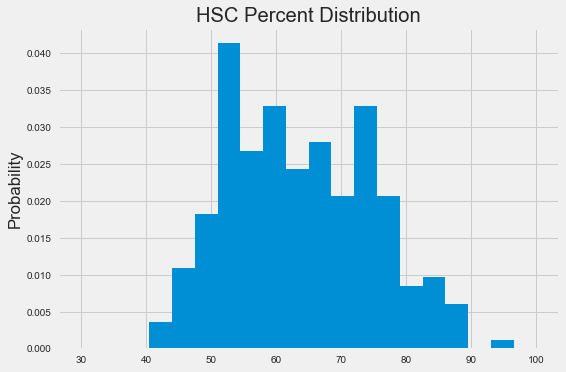

In [350]:
plt.style.use('fivethirtyeight')
plt.hist(students['Percent_HSC'], bins=20, density=True, log=False, range=(30, 100))
plt.title("HSC Percent Distribution")
plt.ylabel("Probability")
plt.show()

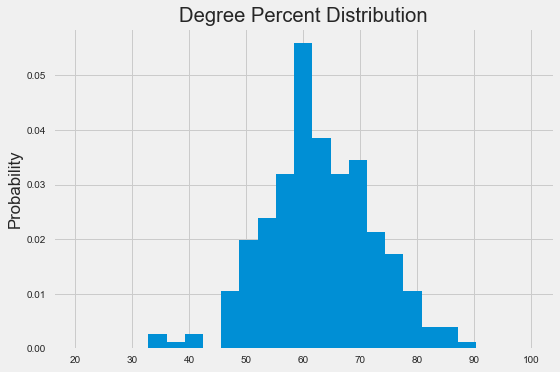

In [351]:
plt.style.use('fivethirtyeight')
plt.hist(students['Percent_Degree'], bins=25, density=True, log=False, range=(20, 100))
plt.title("Degree Percent Distribution")
plt.ylabel("Probability")
plt.show()

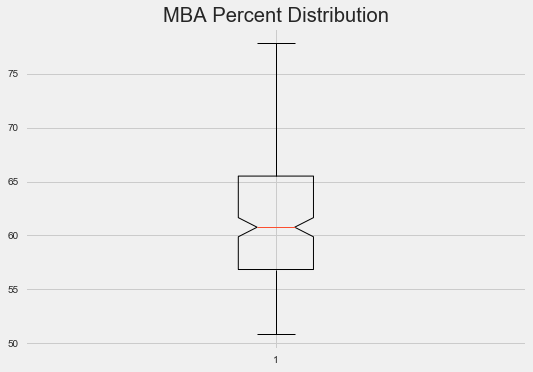

In [359]:
fig, ax = plt.subplots()
plt.boxplot(students['Percent_MBA'], notch=True, vert=True, showfliers=True)
plt.title("MBA Percent Distribution")
plt.show()

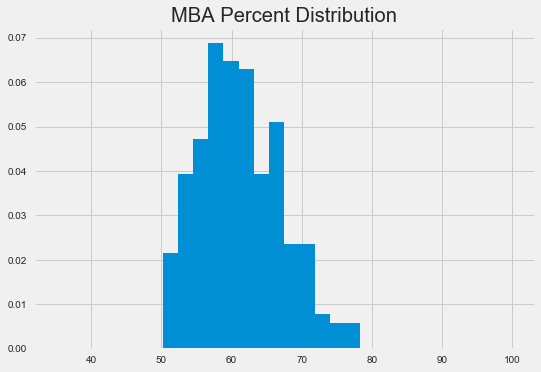

In [361]:
plt.hist(students['Percent_MBA'], bins=30, density=True, range=(35,100))
plt.title("MBA Percent Distribution")
plt.show()

Everybody in our dataset scored more than 50% in their MBA exams. Could this be due to placement cut-off set by differenet hiring companies?

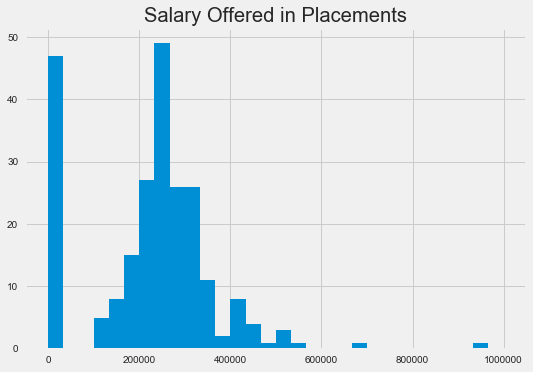

In [369]:
plt.hist(students['Salary'], bins=30, density=False, range=(-5, 1000000))
plt.title("Salary Offered in Placements")
plt.show()

There are some candidates not placed during campus placement and their Salary is zero. There are exceptional candidates with a very good package as well. Let us look at boxplot as well to see if there are any outliers.

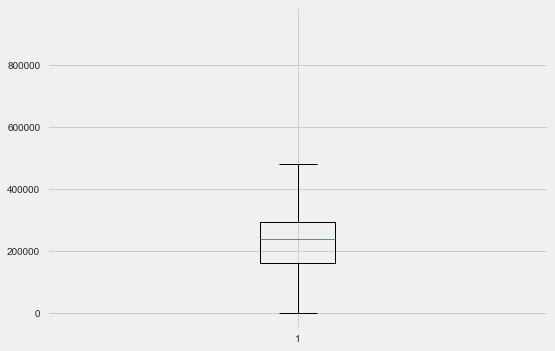

In [372]:
plt.boxplot(students['Salary'], showfliers=True)
plt.show()

In [ ]:
#students.loc[students['Course_Degree']=='Arts','Course_Degree'] = 'Others'

Let's confirm the counts for each category for Course_Degree, now we see that Others & Science both have appox. 5%

In [ ]:
#students['Course_Degree'].value_counts(normalize=True)

In [ ]:
pd.crosstab(students['Course_Degree'], students['Gender']).plot.barh()
plt.show()